<a href="https://colab.research.google.com/github/RaianaSeixas/Portifolio/blob/main/Python_for_Finance/04_Web_Scraping_yfinance_Tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this code we will analyse Tesla stocks information.**

Scraping Yahoo Finance with Pandas involves manual work, including adding a header, specifying the URL, making the request and using the read_html() function.
Another way to get financial data from Yahoo Finance is to use the yfinance package.

Data available on:                                    
https://finance.yahoo.com/quote/TSLA?p=TSLAm    
https://finance.yahoo.com/trending-tickers

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6] #changing graph area

In [ ]:
data = yf.Ticker("TSLA") #get data about a specific stock
print(data.info)
#pd.DataFrame(data.info)

{'zip': '78725', 'sector': 'Consumer Cyclical', 'fullTimeEmployees': 99290, 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians; and vehicle limited warranties a

In [ ]:
''' This table shows all the informations that can be requested for an specific ticker '''

df=pd.DataFrame(data.info.keys()) 
pd.set_option('display.max_rows', 160) #display 160 rows
df

,0
0,zip
1,sector
2,fullTimeEmployees
3,longBusinessSummary
4,city
5,phone
6,state
7,country
8,companyOfficers
9,website


In [ ]:
print('Profit Margins=',data.info['profitMargins'])
print('Return On Equity=',data.info['returnOnEquity'])

Profit Margins= 0.13505
Return On Equity= 0.28261


          Revenue    Earnings
Year                         
2018  21461000000  -976000000
2019  24578000000  -862000000
2020  31536000000   721000000
2021  53823000000  5519000000


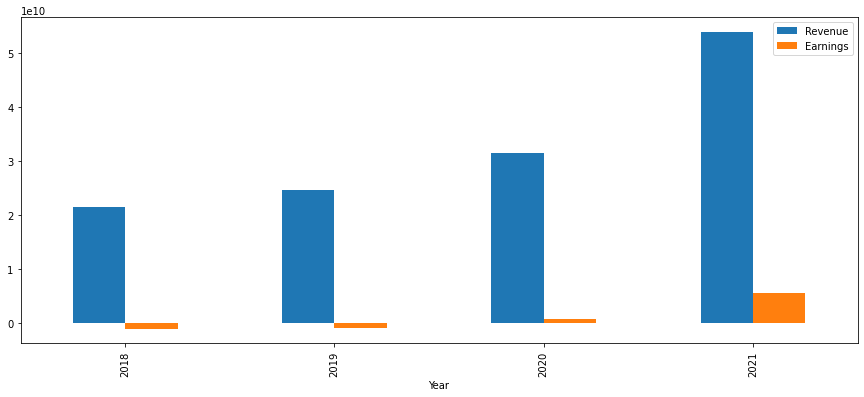

In [ ]:
#Display Revenues and Profits

#data = yf.Ticker("TSLA")

x = data.earnings
print(x)

x.plot(kind="bar")
plt.savefig('plot.png')


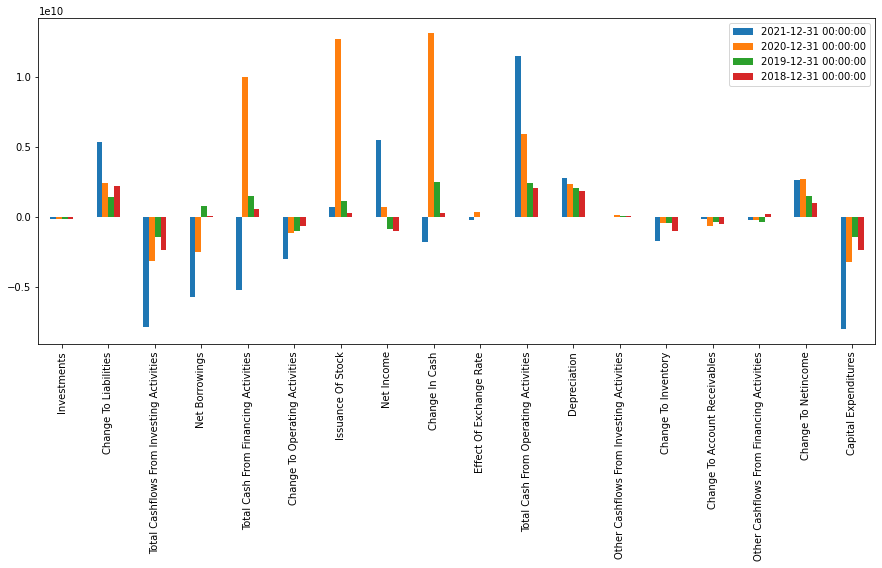

In [ ]:
#Display Cashflow
cf = data.cashflow
#print(cf)

cf.plot(kind="bar")
plt.show()

In [ ]:
#The .recommendations field provides data on historic recommendations by investment banks.
#Let's filter only the ones that are recent:

x = data.recommendations
x = x[x.index > '2022-05-01'] #The index of the DataFrame is the Date column.
x

,Firm,To Grade,From Grade,Action
Date,,,,
2022-05-10 10:05:54,Berenberg,Hold,,init
2022-05-12 10:35:57,Wells Fargo,Equal-Weight,,main
2022-05-17 13:35:00,Tudor Pickering,Hold,Sell,up
2022-05-18 10:28:11,Piper Sandler,Overweight,,main
2022-05-19 11:11:04,Wedbush,Outperform,,main
2022-05-24 10:15:56,Daiwa Capital,Outperform,,main
2022-05-26 10:53:18,Jefferies,Buy,,main
2022-06-01 12:08:20,Goldman Sachs,Buy,,main
2022-06-03 11:22:15,Cowen & Co.,Market Perform,,main


In [ ]:
'''
This function will take a ticker as its parameter, and output the ROE value for that ticker.
This will allow you to compare the ROE values of different companies:
'''

def RoE(ticker):
    data = yf.Ticker(ticker)
    roe = data.info['returnOnEquity']
    name = data.info['shortName']
    print(name, "-", "ROE:", roe)


In [ ]:
RoE('TSLA')
RoE('AAPL')
RoE('MSFT')
RoE('PETR4.SA')

Tesla, Inc. - ROE: 0.28261
Apple Inc. - ROE: 1.49271
Microsoft Corporation - ROE: 0.48721
PETROBRAS   PN  EDJ N2 - ROE: 0.39818


In [ ]:
data = yf.Ticker('TSLA')
data.history() #if period is not specified, it shows the last 30 days

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-05-04,903.940002,955.500000,885.280029,952.619995,27214600,0,0
2022-05-05,939.020020,945.599976,857.700012,873.280029,30839700,0,0
2022-05-06,887.000000,888.000000,843.109985,865.650024,24301000,0,0
2022-05-09,836.450012,845.630005,781.150024,787.109985,30270100,0,0
2022-05-10,819.309998,825.359985,774.250000,800.039978,28133900,0,0
2022-05-11,795.000000,809.770020,727.200012,734.000000,32408200,0,0
2022-05-12,701.000000,759.659973,680.000000,728.000000,46771000,0,0
2022-05-13,773.479980,787.349976,751.570007,769.590027,30716900,0,0
2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0


In [ ]:
'''
We can provide a period parameter
Valid periods: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max.
'''
data.history(period='5d') #history for the last 5 days


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-05-27,723.250000,759.799988,720.530029,759.630005,29765000,0,0
2022-05-31,773.840027,778.799988,734.229980,758.260010,33971500,0,0
2022-06-01,755.159973,771.979980,730.919983,740.369995,25749300,0,0
2022-06-02,732.469971,792.630005,726.200012,775.000000,31157700,0,0
2022-06-03,729.674988,743.389893,700.253418,703.549988,36763497,0,0


In [ ]:
# We can also provide custom start and end dates
(data.history(start="2021-01-01", end="2021-12-31"))

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-04,719.460022,744.489990,717.190002,729.770020,48638200,0,0
2021-01-05,723.659973,740.840027,719.200012,735.109985,32245200,0,0
2021-01-06,758.489990,774.000000,749.099976,755.979980,44700000,0,0
2021-01-07,777.630005,816.989990,775.200012,816.039978,51498900,0,0
2021-01-08,856.000000,884.489990,838.390015,880.020020,75055500,0,0
...,...,...,...,...,...,...,...
2021-12-23,1006.799988,1072.979980,997.559998,1067.000000,30904400,0,0
2021-12-27,1073.670044,1117.000000,1070.719971,1093.939941,23715300,0,0
2021-12-28,1109.489990,1119.000000,1078.420044,1088.469971,20108000,0,0


Mean price in the last 3 months= 885.8268709182739


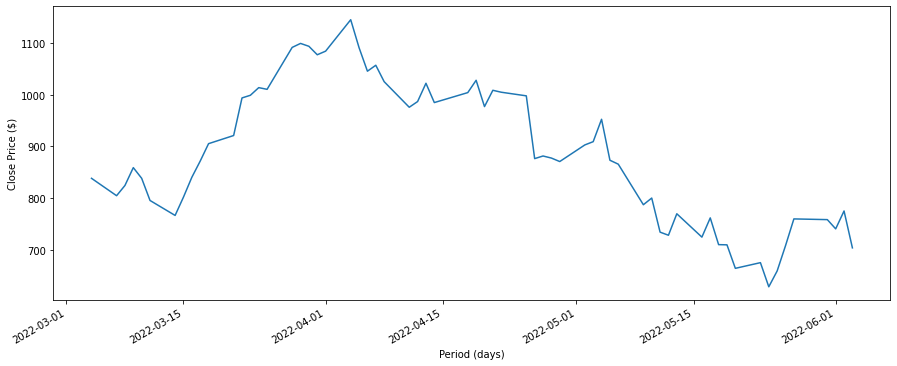

In [ ]:
# Let's plot the daily Close price of Tesla stock for the last 3 months and calculate its average:

x = data.history('3mo')['Close']
x.plot()
plt.ylabel('Close Price ($)')
plt.xlabel('Period (days)')
plt.savefig('plot.png')
print("Mean price in the last 3 months=",x.mean())

In [ ]:
'''
 yfinance allows you to download historical prices for more than one stock simultaneously
^IXIC - NASDAQ Composite
GM - General Motors Company
TSLA - Tesla
'''
data = yf.download("TSLA GM ^IXIC" , start='2022-01-01') 
data['Close'].tail()


[*********************100%***********************]  3 of 3 completed


,GM,TSLA,^IXIC
Date,,,
2022-05-27,38.570000,759.630005,12131.129883
2022-05-31,38.680000,758.260010,12081.389648
2022-06-01,38.270000,740.369995,11994.459961
2022-06-02,38.869999,775.000000,12316.900391
2022-06-03,37.610001,703.549988,12012.734375


In [ ]:
#data['Close'].plot()
#plt.savefig('plot.png')

               Close
Date                
2022-05-27  0.073333
2022-05-31 -0.001804
2022-06-01 -0.023594
2022-06-02  0.046774
2022-06-03 -0.092194


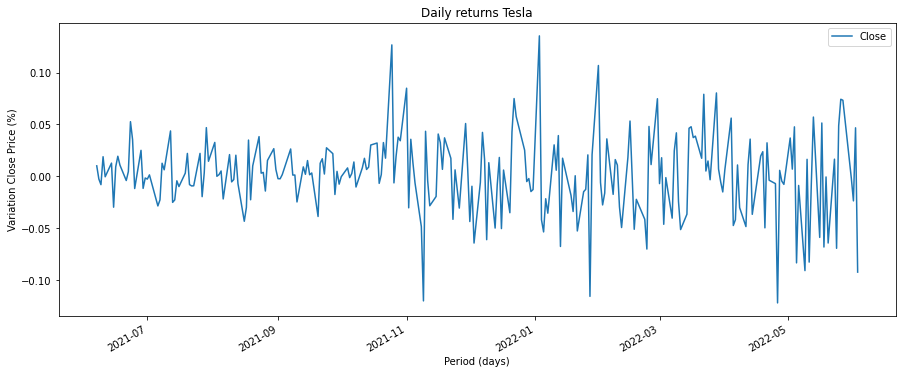

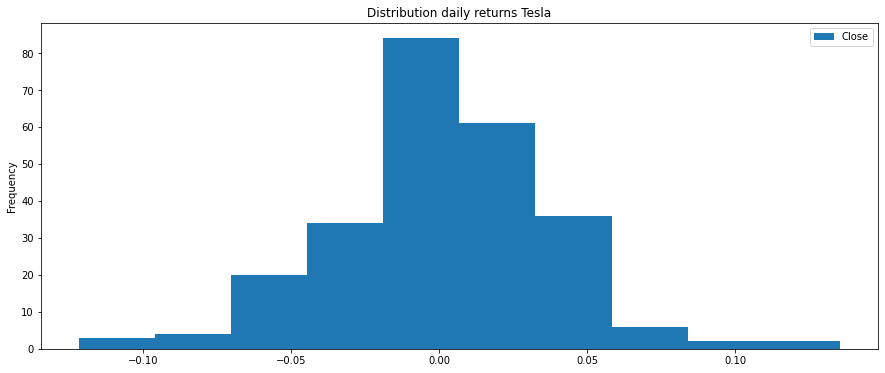

In [ ]:
'''
Calculation of daily returns

pct_change() function, calculates the percentage change between the current element and a prior one.
'''
data = yf.Ticker('TSLA')
name = data.info['shortName']
price = data.history(period='1y')

x = price['Close'].pct_change()
x=pd.DataFrame(x)
print(x.tail())

#Graphs

x.plot()
plt.title('Daily returns Tesla')
plt.ylabel('Variation Close Price (%)')
plt.xlabel('Period (days)')
plt.show()

x.plot(kind='hist')
plt.title('Distribution daily returns Tesla')
plt.show()

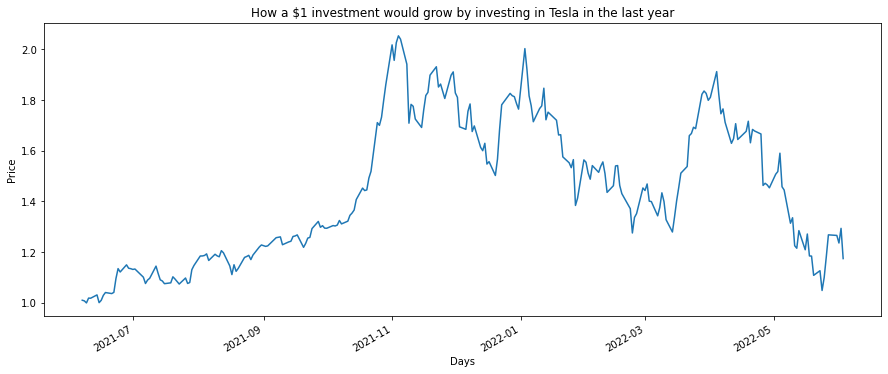

Date
2022-05-27    1.268058
2022-05-31    1.265771
2022-06-01    1.235907
2022-06-02    1.293715
2022-06-03    1.174443
Name: Close, dtype: float64


In [ ]:
'''
Calculation of the cumulative return of an investment:
It can be done using the combinations of pct_change() and cumprod() functions:

The plot shows how a $1 investment would grow.
'''
a = price['Close'].pct_change() # Computing the percentage change from the immediately previous row by default.

returns = (a + 1).cumprod() # Returning cumulative product over a DataFrame or Series axis.

returns.plot()
plt.title('How a $1 investment would grow by investing in Tesla in the last year')
plt.ylabel('Price')
plt.xlabel('Days')
plt.show()

print(returns.tail())

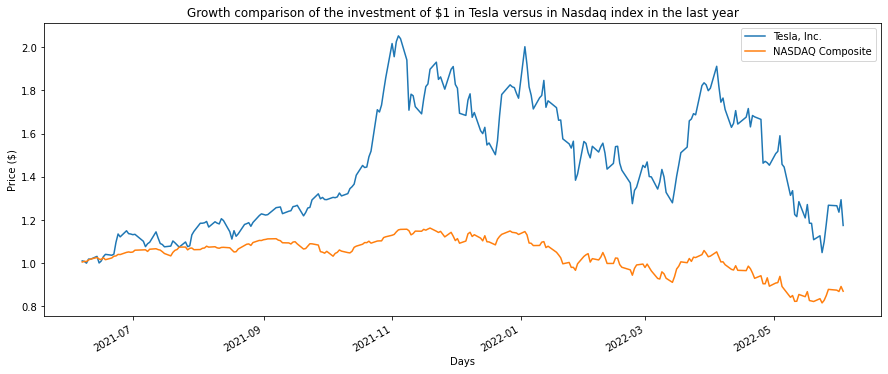

In [ ]:
# Growth comparison of the investment of $1 in Tesla versus in Nasdaq index

dataindex = yf.Ticker('^IXIC') #^IXIC - NASDAQ Composite
nameindex = dataindex.info['shortName']

priceindex = dataindex.history(period='1y')

b = priceindex['Close'].pct_change() # Computing the percentage change from the immediately previous row by default.

returnsindex = (b + 1).cumprod() # Returning cumulative product over a DataFrame or Series axis.

result = pd.concat([returns, returnsindex], axis=1)

result.columns = [name, nameindex] #Rename columns with stock namens

result.plot()
plt.title('Growth comparison of the investment of $1 in Tesla versus in Nasdaq index in the last year')
plt.ylabel('Price ($)')
plt.xlabel('Days')
plt.show()

In [ ]:
result.tail()

,"Tesla, Inc.",NASDAQ Composite
Date,,
2022-05-27,1.268058,0.878145
2022-05-31,1.265771,0.874545
2022-06-01,1.235907,0.868252
2022-06-02,1.293715,0.891593
2022-06-03,1.174443,0.869575
